# Data cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.decomposition import PCA
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', False)

In [2]:
consumer_data: pd.DataFrame = pd.read_csv('./data/marketing_campaign.csv', sep='\t')
consumer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Finding number of records
consumer_data.shape[0]

2240

In [4]:
# Finding general information about the columns
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 1. Handling missing values

In [5]:
''' 
We see that the non null count of "Income" is least and reduces the dataset
by only 1% i,e 24 rows, so we do either of the 2 things
1. We can drop the records directly
2. We can fill the missing values

Since we do not have a lot of data, we prefer to retain the records and fill them with mean income value
'''
consumer_data['Income'].fillna(consumer_data['Income'].mean(), inplace=True)

### 2. Dropping Duplicate records

In [6]:
# We directly drop duplicates as they do not contribute uniquely to our models
consumer_data.drop_duplicates(inplace=True)
consumer_data.shape[0]

2240

### 3. Format Standardizing

In [7]:
'''
We standardize formatting of numberical values, floating point precisions and formatting the date column
'''
consumer_data['Dt_Customer'] = pd.to_datetime(consumer_data['Dt_Customer'], format='%d-%m-%Y')
consumer_data['Income'] = consumer_data['Income'].round(2)

### 4. Structural Consistency

In [8]:
'''
We make sure the labels of categorical data are consistent, so that we do not face encoding
challenged later
'''
print('Education column value = ', consumer_data['Education'].unique())
print('Maritial status column value = ',consumer_data['Marital_Status'].unique())

consumer_data['Education'] = consumer_data['Education'].str.lower()
consumer_data['Marital_Status'] = consumer_data['Marital_Status'].str.lower()

Education column value =  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Maritial status column value =  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [9]:
'''
Here we see 2n cycle and master correspond to the same education level
Similarly to reduce unnecessary complexity, 
    we mark single, alone, absurd, widow, divorced, yolo as single and 
    together, married as married
'''
education_mapping = {
    'graduation': 'grad',
    'phd': 'postgrad',
    'master': 'postgrad',
    'basic': 'grad',
    '2n cycle': 'postgrad'
}

maritial_status_mapping = {
    'single': 'single',
    'together': 'married',
    'married': 'married',
    'divorced': 'single',
    'widow': 'single',
    'alone': 'single',
    'absurd': 'single',
    'yolo': 'single',
}
consumer_data['Education'] = consumer_data['Education'].replace(education_mapping)
consumer_data['Marital_Status'] = consumer_data['Marital_Status'].replace(maritial_status_mapping)

consumer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,grad,single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,grad,single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,grad,married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,grad,married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,postgrad,married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
'''
We plot statistics of the dataset to find more about data
'''
consumer_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251339,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


#### Observations:
1. ID is just a unique field which does not have any signifance to predicting or clustering, we can use index instead of the id
2. Z_CostContact and Z_Revenue have same values throughout the dataset, hence they are redundant
3. Income might have outlier becasue the max income is really far away from mean as well as 3rd quantile
4. Year_Birth might also have outlier since mean=1968, std=12 and min value=1893

### 5. Dropping unwanted features

In [11]:
consumer_data.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,grad,single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,grad,single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,grad,married,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,grad,married,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,postgrad,married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


#### 6. Finding Outliers

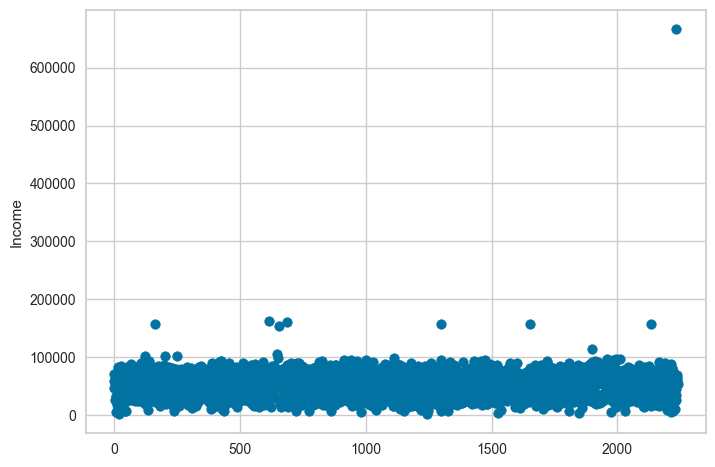

In [12]:
x = [i for i in range(0, consumer_data.shape[0])]
plt.scatter(x, consumer_data['Income'])
plt.ylabel('Income')
plt.show()

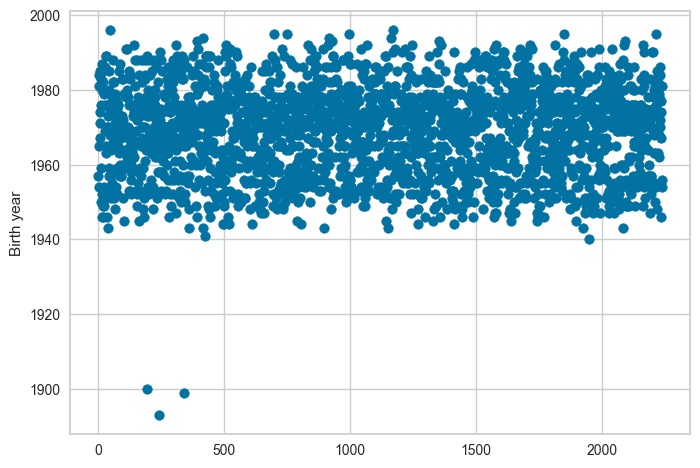

In [13]:
x = [i for i in range(0, consumer_data.shape[0])]
plt.scatter(x, consumer_data['Year_Birth'])
plt.ylabel('Birth year')
plt.show()

In [14]:
'''
We remove the outliers from income and year_birth column
For income, we remove the few local outliers, hence we cap income to 140000
'''
consumer_data = consumer_data[(consumer_data['Income'] < 140000) & (consumer_data['Year_Birth'] > 1920)]
consumer_data.shape[0]

2229

### 7. Feature Selection

In [15]:
'''
We can reduce some columns like "Kidhome" and "Teenhome" by combining them
'''
consumer_data['Children'] = consumer_data['Kidhome'] + consumer_data['Teenhome']
consumer_data.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
consumer_data.head()


,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children
0,1957,grad,single,58138.0,2012-09-04,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,0
1,1954,grad,single,46344.0,2014-03-08,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,2
2,1965,grad,married,71613.0,2013-08-21,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,0
3,1984,grad,married,26646.0,2014-02-10,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,1
4,1981,postgrad,married,58293.0,2014-01-19,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,1


### 8. Column Label Renaming

In [16]:
'''
Column label renaming helps us the make column name more intuitive, concise and consistent
'''
column_name_map = {
    'Recency': 'Last_Purchase',
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntGoldProds': 'Gold',
    'NumDealsPurchases': 'Deal_Purchases',
	'NumWebPurchases': 'Web_Purchases',
	'NumCatalogPurchases': 'Catalog_Purchases',
	'NumStorePurchases': 'Store_Purchases',
	'NumWebVisitsMonth': 'Web_Visits',
}
consumer_data.rename(columns=column_name_map, inplace=True)
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,Store_Purchases,Web_Visits,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children
0,1957,grad,single,58138.0,2012-09-04,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,0
1,1954,grad,single,46344.0,2014-03-08,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,2
2,1965,grad,married,71613.0,2013-08-21,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,0
3,1984,grad,married,26646.0,2014-02-10,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,1
4,1981,postgrad,married,58293.0,2014-01-19,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,1


### 9. Feature scaling

In [17]:
'''
We scale Dt_customer in this block by anchoring it to 1st January 2023
'''
consumer_data['Age'] = 2023 - consumer_data['Year_Birth']
consumer_data['Customer_From'] = (pd.to_datetime('2023-01-01') - consumer_data['Dt_Customer']).dt.days
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
0,1957,grad,single,58138.0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,3771
1,1954,grad,single,46344.0,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,3221
2,1965,grad,married,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,3420
3,1984,grad,married,26646.0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,3247
4,1981,postgrad,married,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,3269


### 10. Label Encoding

In [18]:
'''
We can encode category labels
'''
consumer_data['Education'] = consumer_data['Education'].astype("category").cat.codes.to_list()
consumer_data['Marital_Status'] = consumer_data['Marital_Status'].astype("category").cat.codes.to_list()
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
0,1957,0,1,58138.0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,3771
1,1954,0,1,46344.0,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,3221
2,1965,0,0,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,3420
3,1984,0,0,26646.0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,3247
4,1981,1,0,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,3269


### 11. Data normalization

In [19]:
'''
We normalize the feature values
'''
consumer_data['Income'] = ((consumer_data['Income'] - consumer_data['Income'].min()) / (consumer_data['Income'].max() - consumer_data['Income'].min()))

consumer_data['Income'] = consumer_data['Income'].round(2)

consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
0,1957,0,1,0.50,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,3771
1,1954,0,1,0.40,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,3221
2,1965,0,0,0.62,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,3420
3,1984,0,0,0.22,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,3247
4,1981,1,0,0.51,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,3269


### 12. Data Validation
We just visually go through the data and its statistics to confirm if all the parametes look correct to avoid any inconsistencies

In [20]:
consumer_data.to_csv('./data/clean_consumer_data.csv', index=False)

# EDA

In [21]:
data = pd.read_csv('data/clean_consumer_data.csv')
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
0,1957,0,1,0.50,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,3771
1,1954,0,1,0.40,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,3221
2,1965,0,0,0.62,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,3420
3,1984,0,0,0.22,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,3247
4,1981,1,0,0.51,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,3269


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2229 non-null   int64  
 1   Education          2229 non-null   int64  
 2   Marital_Status     2229 non-null   int64  
 3   Income             2229 non-null   float64
 4   Dt_Customer        2229 non-null   object 
 5   Last_Purchase      2229 non-null   int64  
 6   Wines              2229 non-null   int64  
 7   Fruits             2229 non-null   int64  
 8   Meat               2229 non-null   int64  
 9   Fish               2229 non-null   int64  
 10  Sweet              2229 non-null   int64  
 11  Gold               2229 non-null   int64  
 12  Deal_Purchases     2229 non-null   int64  
 13  Web_Purchases      2229 non-null   int64  
 14  Catalog_Purchases  2229 non-null   int64  
 15  Store_Purchases    2229 non-null   int64  
 16  Web_Visits         2229 

# Descriptive Analysis

In [23]:
# EDA-1 Data Summary
data.describe()

,Year_Birth,Education,Marital_Status,Income,Last_Purchase,Wines,Fruits,Meat,Fish,Sweet,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1968.888739,0.471512,0.355765,0.445523,49.106326,304.991476,26.348587,165.283984,37.642441,27.161507,...,0.073127,0.074921,0.072678,0.064603,0.013459,0.008973,0.149843,0.951996,54.111261,3461.777479
std,11.707430,0.499300,0.478852,0.184026,28.946476,336.761943,39.764060,219.336589,54.700548,41.338945,...,0.260403,0.263324,0.259666,0.245879,0.115255,0.094319,0.356998,0.751976,11.707430,202.248700
min,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,3108.000000
25%,1959.000000,0.000000,0.000000,0.300000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,3289.000000
50%,1970.000000,0.000000,0.000000,0.440000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,53.000000,3464.000000
75%,1977.000000,1.000000,1.000000,0.590000,74.000000,505.000000,33.000000,231.000000,50.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,64.000000,3637.000000
max,1996.000000,1.000000,1.000000,1.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,83.000000,3807.000000


# Plots to check data distribution

## Data Distribution for numerical data values 

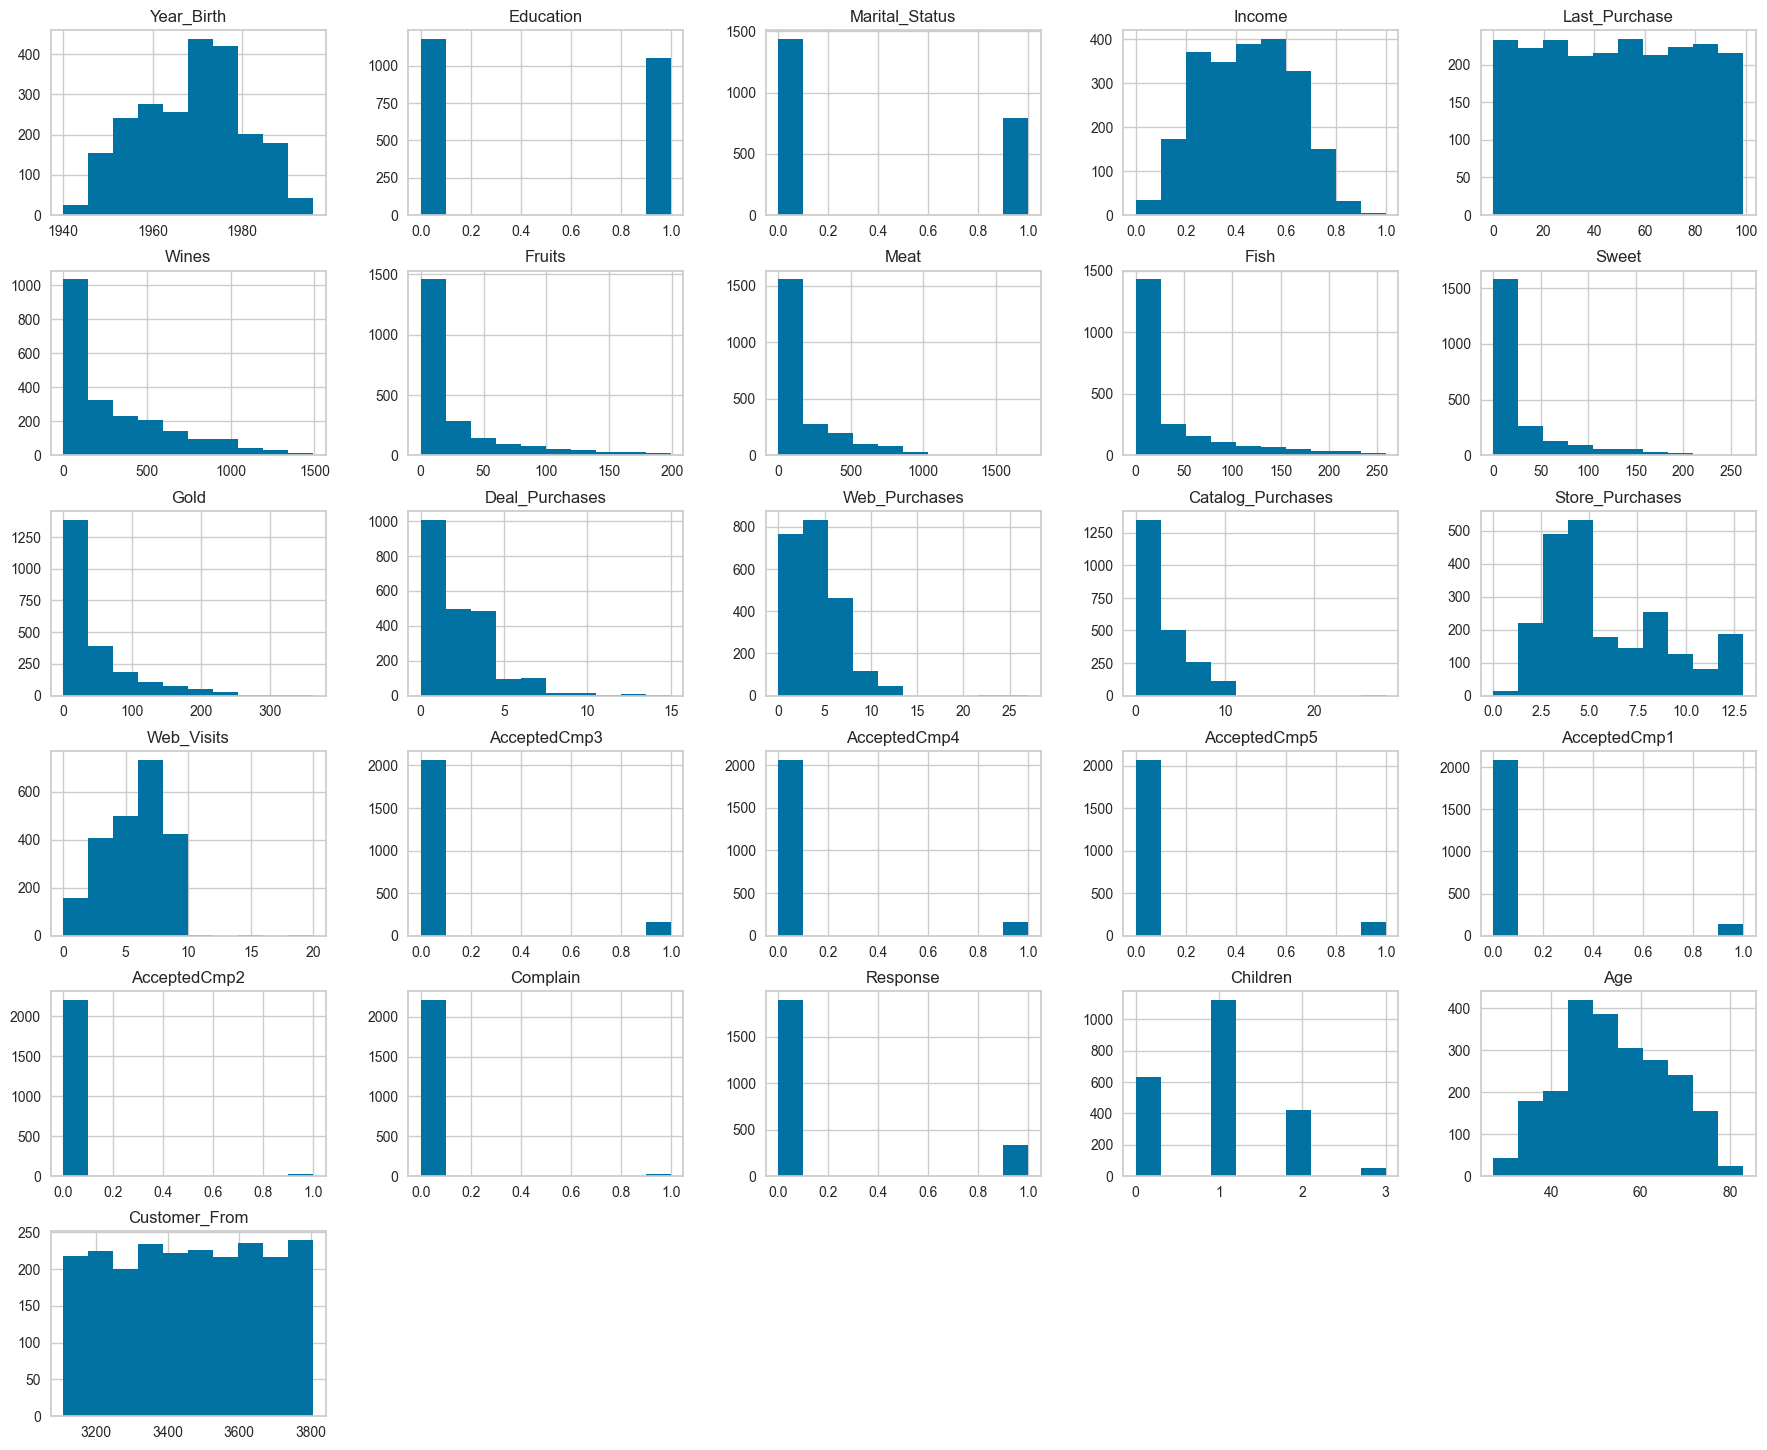

In [24]:
# Histogram
data.hist(figsize=(22, 18))
plt.show()

## Data Distribution for Categorial data values 

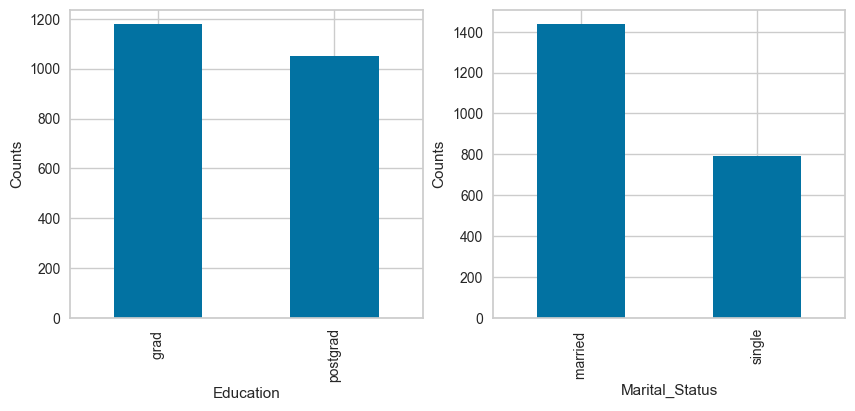

In [25]:
# Bar graph plot for categorical datas

# Subplots for displaying two categorical columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Education subplot
data['Education'].value_counts().plot(kind='bar', ax=axes[0])
# axes[0].set_title('Education')
axes[0].set_ylabel('Counts')
axes[0].set_xticklabels(['grad ', 'postgrad'])

# Maritial Status subplot
data['Marital_Status'].value_counts().plot(kind='bar', ax=axes[1])
# axes[1].set_title('Marital Status')
axes[1].set_ylabel('Counts')
axes[1].set_xticklabels(['married ', 'single'])

plt.show()

# Box Plots

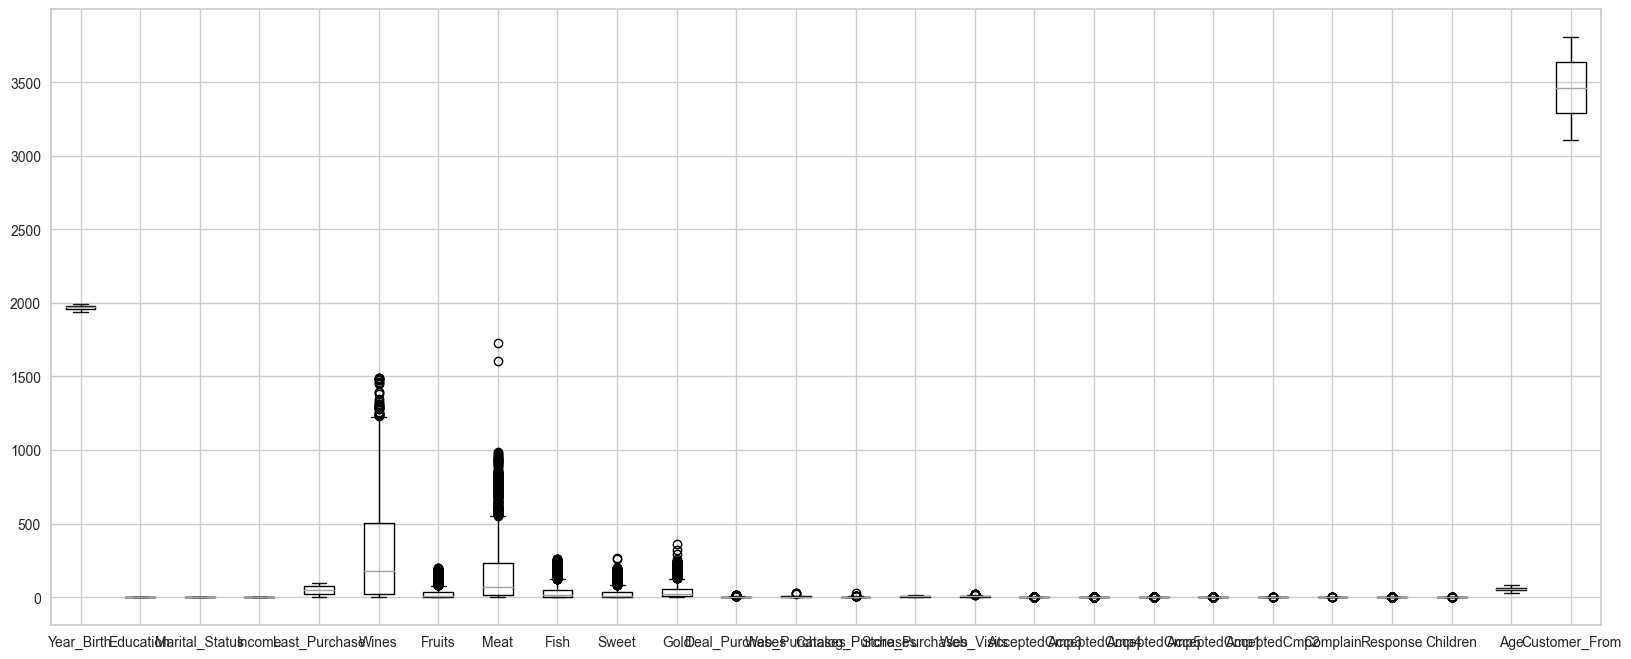

In [26]:
# Box plot
data.boxplot(figsize=(20,8))
plt.show()

# Feature Engineering

In [27]:
data['Total_Spending'] = data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet'] + data['Gold']
data['Luxury_Spending'] = data['Wines'] + data['Gold']
data['Necessity_Spending'] = data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet']
# Added a column 'Need_Attention' for customers who haven't made purchase since a month
data['Need_Attention'] = data['Last_Purchase'].apply(lambda x: 1 if x >= 30 else 0)
data['Luxury_Consumer'] = (data['Luxury_Spending'] > data['Necessity_Spending']).astype(int)


# Scatter Plots

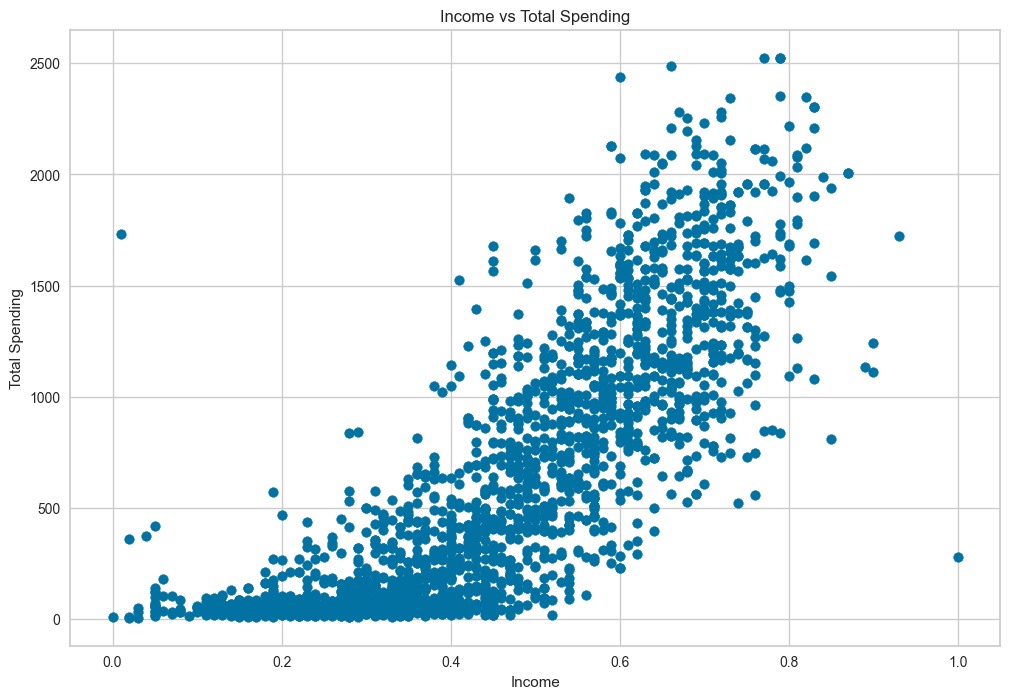

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Income'], data['Total_Spending'])
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

# Target Variable Analysis

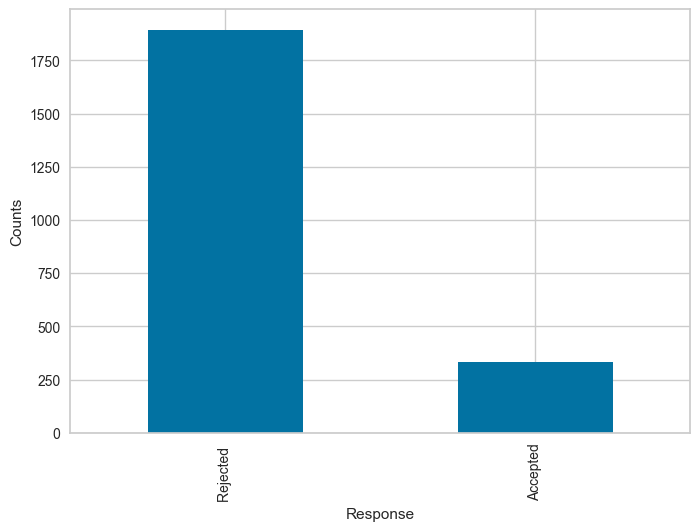

Response
0    85.015702
1    14.984298
Name: proportion, dtype: float64


In [29]:
# Target Variable Analysis
data['Response'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xticks(ticks=[0,1], labels=['Rejected ', 'Accepted'])
plt.show()

targetPercentage = data['Response'].value_counts(normalize=True) * 100
print(targetPercentage)

# Time Series Analysis

In [30]:
# Convert 'Dt_Customer' into datetime datatype
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

## Between Dt_Customer and Income

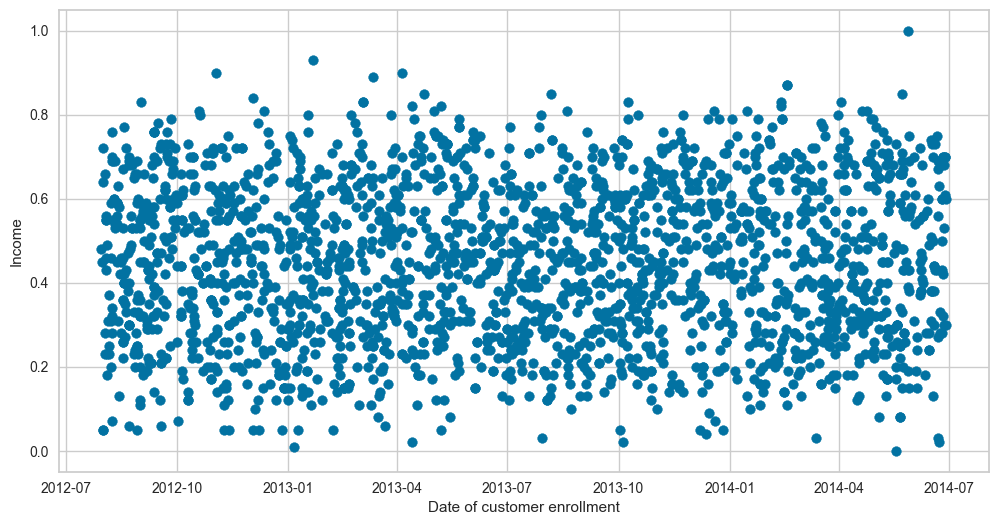

In [31]:
# Create a time series scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Dt_Customer'], data['Income'])
plt.xlabel('Date of customer enrollment')
plt.ylabel('Income')
plt.show()

## Number of customers joined over years

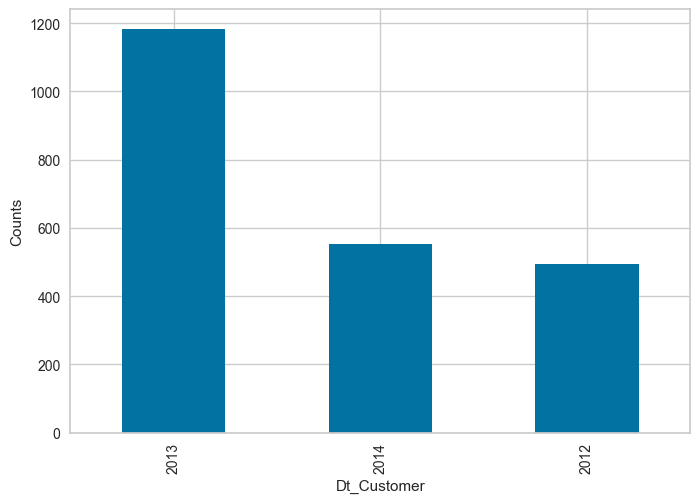

In [32]:
data['Dt_Customer'].dt.year.value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.show()

# Correlation Matrix

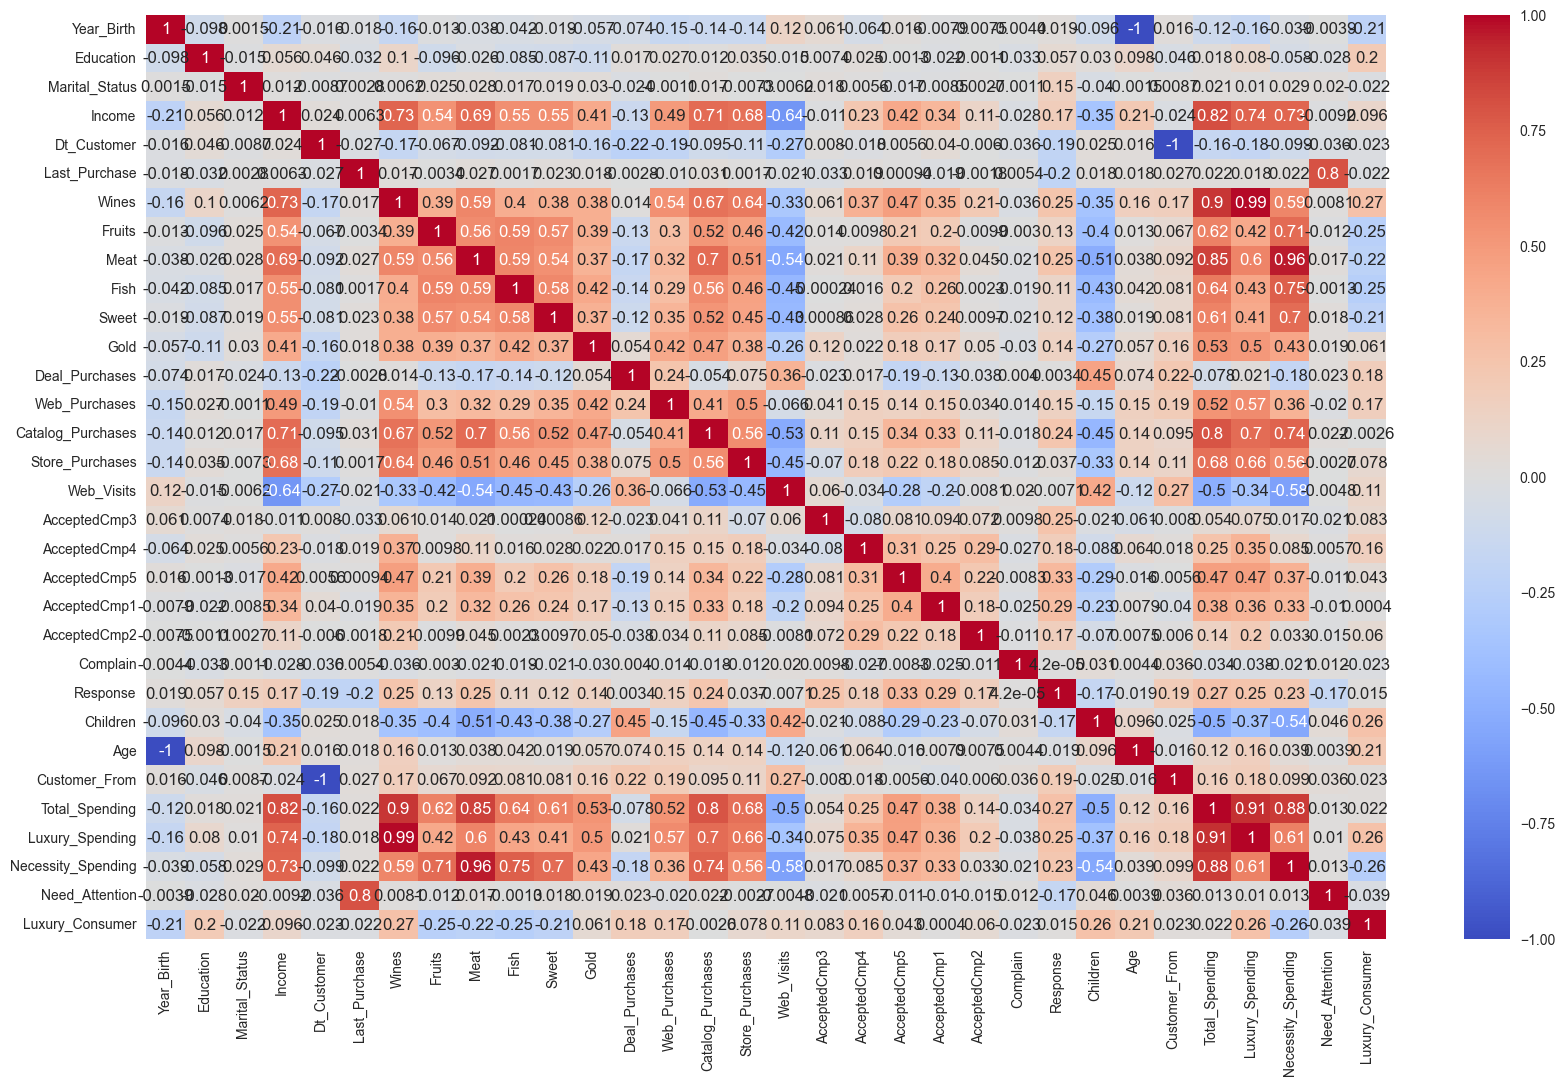

In [33]:
# Correlation matrix
correlationMatrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.show()

# Customer Lifetime Value(CLV) Analysis

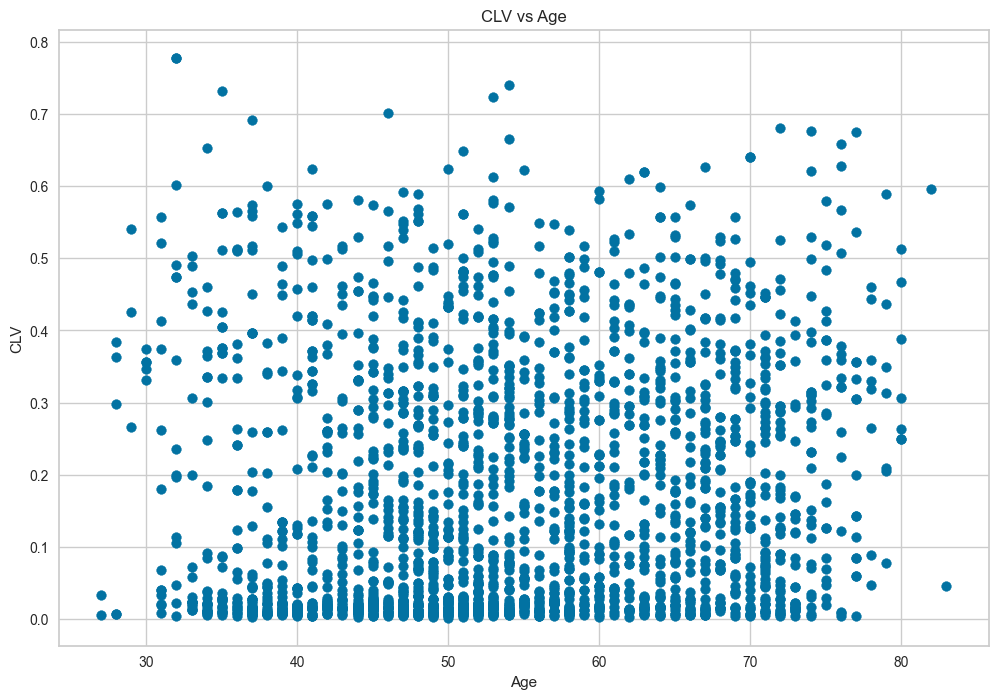

In [34]:
# CLV Analysis
data['CLV'] = data['Total_Spending'] / data['Customer_From'] #Total_Spending is amount and Customer_From is days
plt.figure(figsize=(12, 8))
plt.scatter(data['Age'], data['CLV'])
plt.title('CLV vs Age')
plt.xlabel('Age')
plt.ylabel('CLV')
plt.show()

In [35]:
data.to_csv('./data/post_eda_consumer_data.csv', index=False)

# Phase 2: Models

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.decomposition import PCA
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('data/post_eda_consumer_data.csv')
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,Response,Children,Age,Customer_From,Total_Spending,Luxury_Spending,Necessity_Spending,Need_Attention,Luxury_Consumer,CLV
0,1957,0,1,0.50,2012-09-04,58,635,88,546,172,...,1,0,66,3771,1617,723,894,1,0,0.428799
1,1954,0,1,0.40,2014-03-08,38,11,1,6,2,...,0,2,69,3221,27,17,10,1,1,0.008382
2,1965,0,0,0.62,2013-08-21,26,426,49,127,111,...,0,0,58,3420,776,468,308,0,1,0.226901
3,1984,0,0,0.22,2014-02-10,26,11,4,20,10,...,0,1,39,3247,53,16,37,0,0,0.016323
4,1981,1,0,0.51,2014-01-19,94,173,43,118,46,...,0,1,42,3269,422,188,234,1,0,0.129091


### Feature Engineering from EDA in phase 1

In [38]:
data['Total_Spending'] = data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet'] + data['Gold']
data['Luxury_Spending'] = data['Wines'] + data['Gold']
data['Necessity_Spending'] = data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet']
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

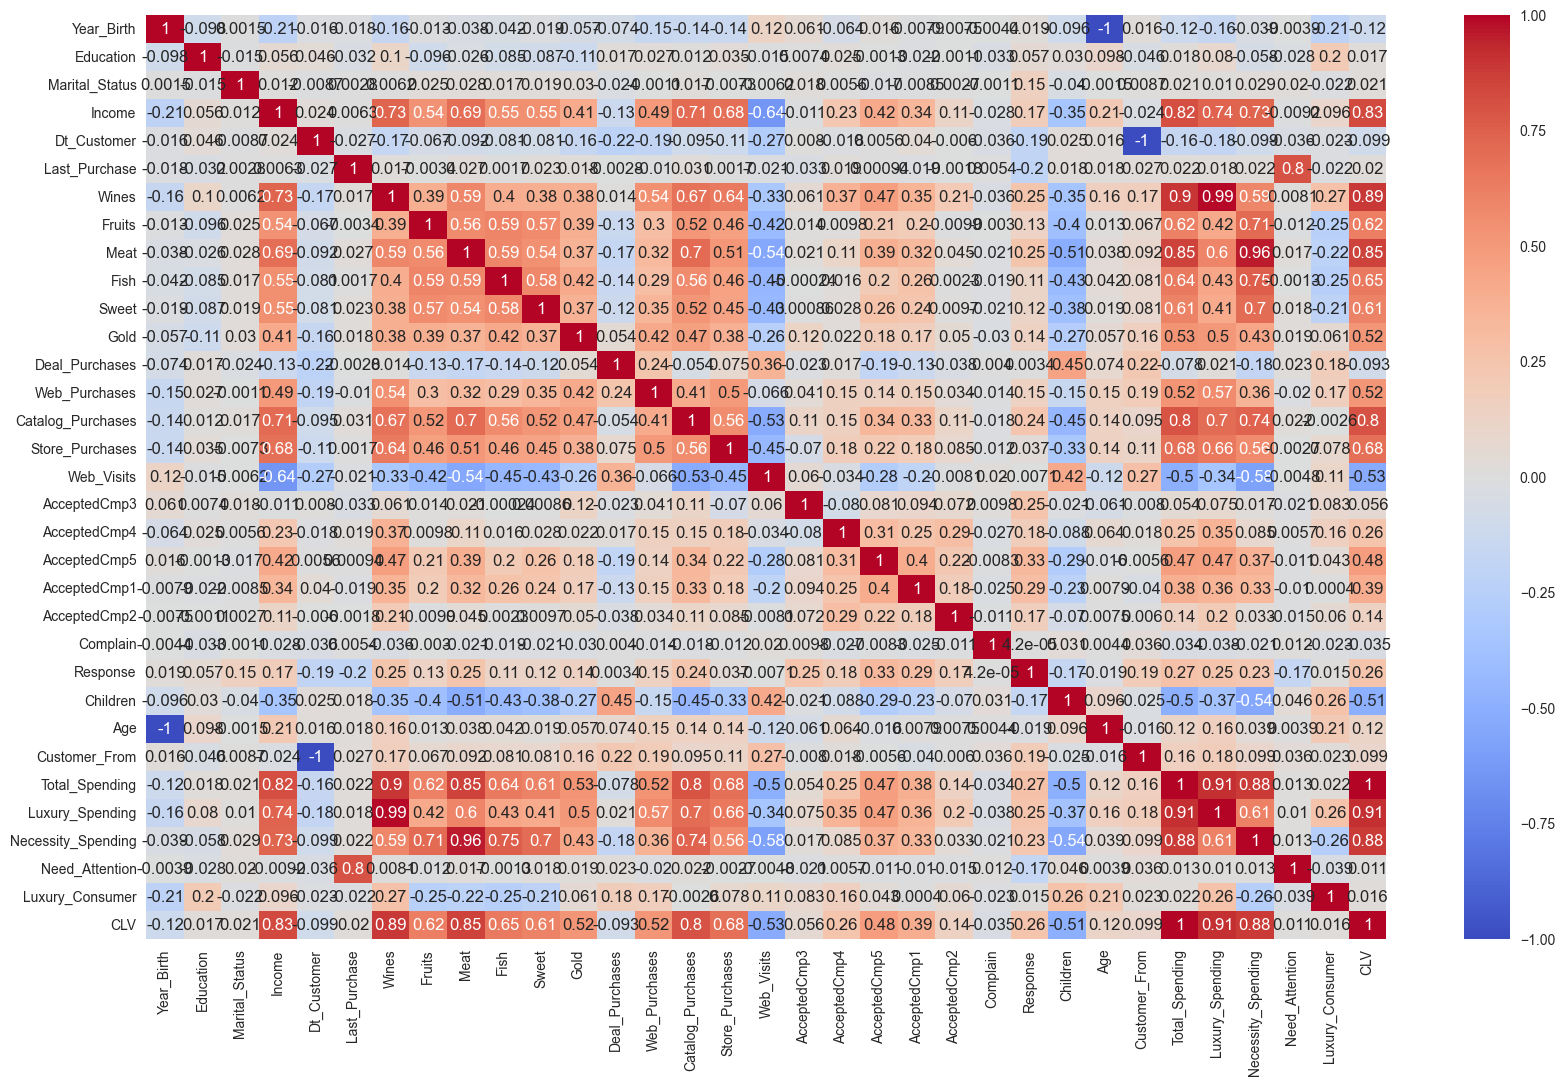

In [39]:
# Correlation matrix
correlationMatrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.show()

## Models that we will use
1. Linear Regression
2. KNN
3. Decision Tree
4. K-Means - Age Group
5. Logistic Regression
6. Gradient Boosting


## Linear Regression

In [40]:
linear_regression_X = data[['Income', 'Children', 'Age','Marital_Status', 'Web_Visits', 'Response', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Deal_Purchases', 'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']]
linear_regression_y = data['Total_Spending']

lnr_X_train, lnr_X_test, lnr_y_train, lnr_y_test = train_test_split(linear_regression_X, linear_regression_y, test_size=0.1, random_state=42)

In [41]:
lnr = LinearRegression()
lnr.fit(lnr_X_train, lnr_y_train)

lnr_y_pred = lnr.predict(lnr_X_test)
mse = mean_squared_error(lnr_y_test, lnr_y_pred)
print(f"Linear Regression Mean Squared Error: {mse:.4f}")

Linear Regression Mean Squared Error: 59942.7681


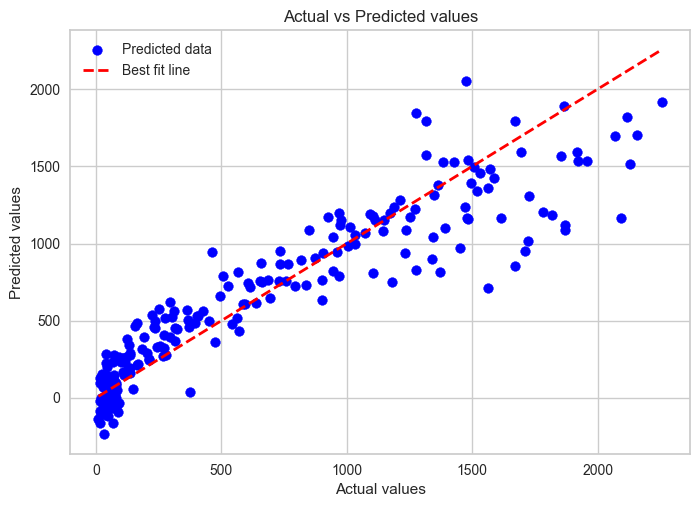

In [42]:
# Plotting actual vs predicted values
plt.scatter(lnr_y_test, lnr_y_pred, color='blue', label='Predicted data')
plt.plot([min(lnr_y_test), max(lnr_y_test)], [min(lnr_y_test), max(lnr_y_test)], linestyle='--', color='red', linewidth=2, label='Best fit line')
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

## Logistic Regression

In [43]:
logistic_regression_data = data[['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'Age', 'Customer_From', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Deal_Purchases', 'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases', 'Web_Visits', 'Response']]
logistic_regression_X = logistic_regression_data.drop(columns=['Response'])
logistic_regression_y = logistic_regression_data[['Response']]

lgr_X_train, lgr_X_test, lgr_y_train, lgr_y_test = train_test_split(logistic_regression_X, logistic_regression_y, test_size=0.2, random_state=42)

In [44]:
lgr = LogisticRegression()
lgr.fit(lgr_X_train, lgr_y_train)


lgr_y_pred = lgr.predict(lgr_X_test)

accuracy = accuracy_score(lgr_y_test, lgr_y_pred)
print('Accuracy Score for logistic regression on Response is ', accuracy*100)

Accuracy Score for logistic regression on Response is  87.21973094170403


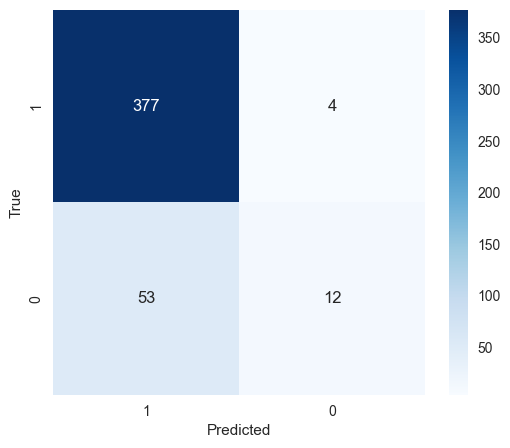

In [45]:
logistic_regression_confusion_matrix = confusion_matrix(lgr_y_test, lgr_y_pred)
plt.figure(figsize=(6, 5))
classes = logistic_regression_data['Response'].unique()
sns.heatmap(logistic_regression_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## K-Means Clustering

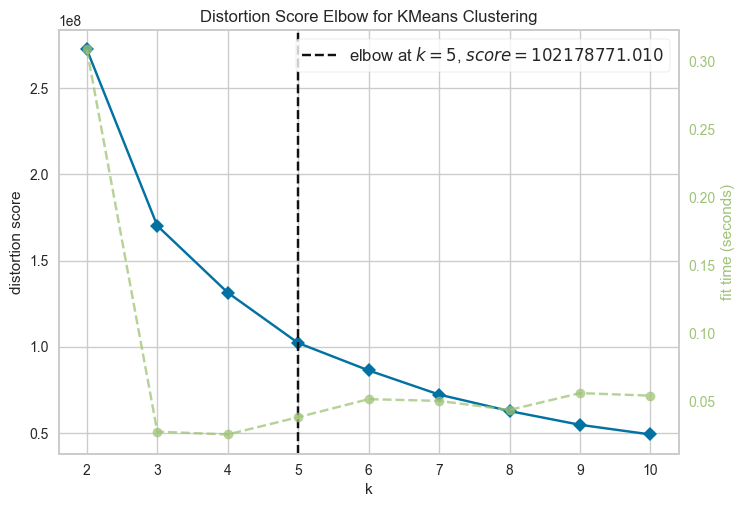

In [46]:
kmeans = KMeans()
k_means_data = data[['Customer_From', 'Total_Spending']]
optimal_k_finder = KElbowVisualizer(kmeans, k=10)
optimal_k_finder.fit(k_means_data)
optimal_k_finder.show()

plt.show()

Text(0, 0.5, 'Total_Spending')

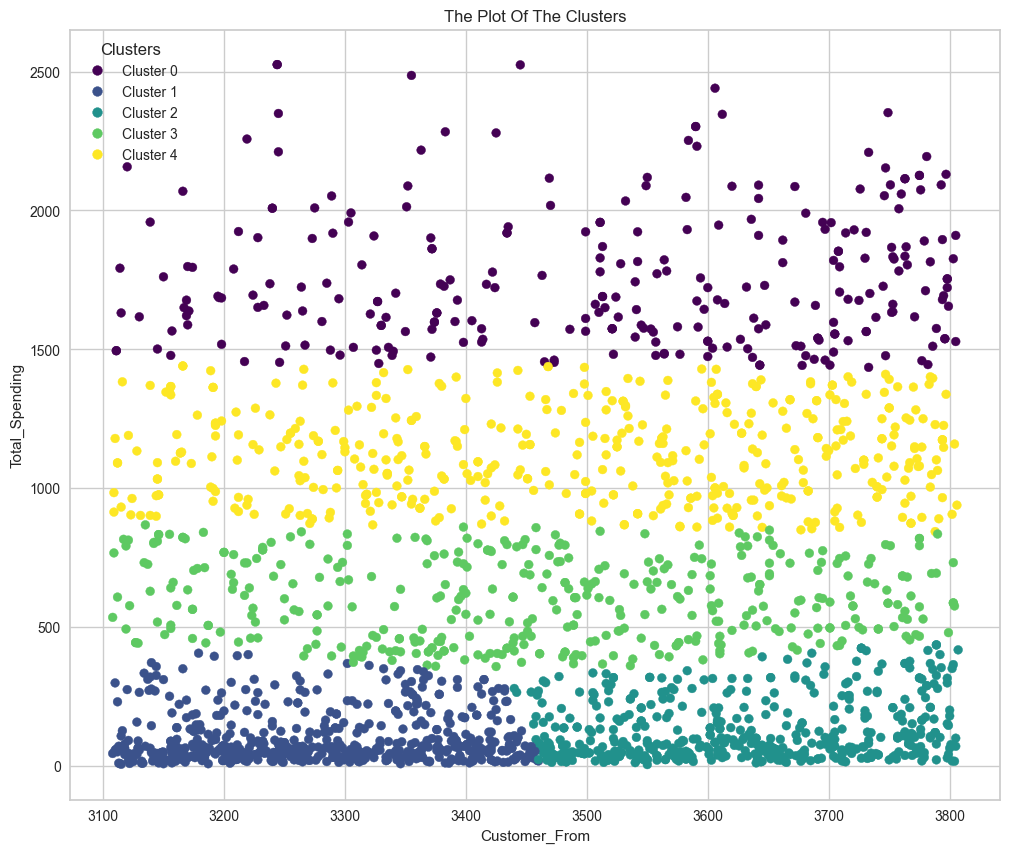

In [47]:
kmeans = KMeans(n_clusters=5)
data['Cluster'] = kmeans.fit_predict(k_means_data)
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, label="bla")
# data['Cluster'] = data['Cluster'].map({0: 'Level1', 1: 'Level2', 2: 'Level3'})
# scatter_plot = ax.scatter(data['Customer_From'], data['Total_Spending'], data['Last_Purchase'], s=40, c=data['Cluster'], marker='o', cmap = 'viridis' )
scatter_plot = ax.scatter(data['Customer_From'], data['Total_Spending'], s=40, c=data['Cluster'], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
legend_labels = [f'Cluster {i}' for i in range(len(set(data['Cluster'])))]
ax.legend(handles=scatter_plot.legend_elements()[0], labels=legend_labels, title="Clusters")
ax.set_xlabel('Customer_From')
ax.set_ylabel('Total_Spending')
# ax.set_zlabel('Last_Purchase')

In [48]:
# Drop Cluster column as it was only used for K-means
data = data.drop(columns=['Cluster'])

## KNN

KNN Accuracy: 0.7085


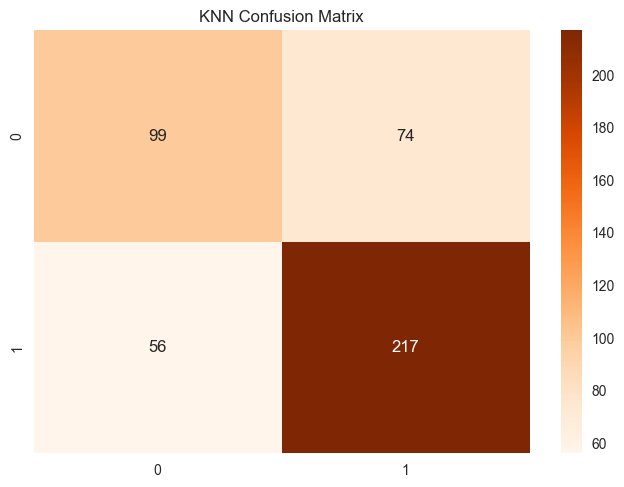

In [49]:
knn_X = data[['Income','Catalog_Purchases','Store_Purchases','Web_Purchases','Age']]
knn_y = data[['Luxury_Consumer']]

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
knn_X_train_scaled = scaler.fit_transform(knn_X_train)
knn_X_test_scaled = scaler.transform(knn_X_test)

knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(knn_X_train_scaled, knn_y_train)


knn_y_pred = knnClassifier.predict(knn_X_test_scaled)

accuracy = accuracy_score(knn_y_test, knn_y_pred)
confusion_mat = confusion_matrix(knn_y_test, knn_y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
sns.heatmap(confusion_matrix(knn_y_test, knn_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('KNN Confusion Matrix')
plt.show()

KNN Accuracy: 0.71


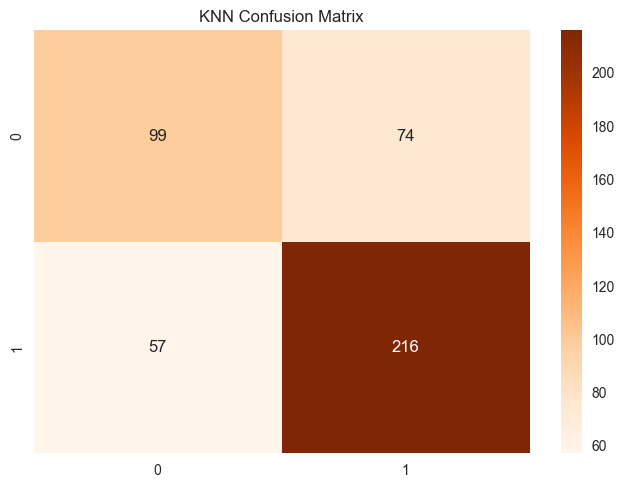

In [50]:
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(knn_X_train_scaled, knn_y_train)
knn_y_pred = knnClassifier.predict(knn_X_test_scaled)

accuracy = accuracy_score(knn_y_test, knn_y_pred)
confusion_mat = confusion_matrix(knn_y_test, knn_y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")
sns.heatmap(confusion_matrix(knn_y_test, knn_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('KNN Confusion Matrix')
plt.show()

In [51]:
dt_X = data[['Income', 'Total_Spending']]
dt_y = data[['Need_Attention']]

dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
dt_X_train_scaled = scaler.fit_transform(dt_X_train)
dt_X_test_scaled = scaler.transform(dt_X_test)

## Decision Trees

DT Accuracy: 0.6367713004484304


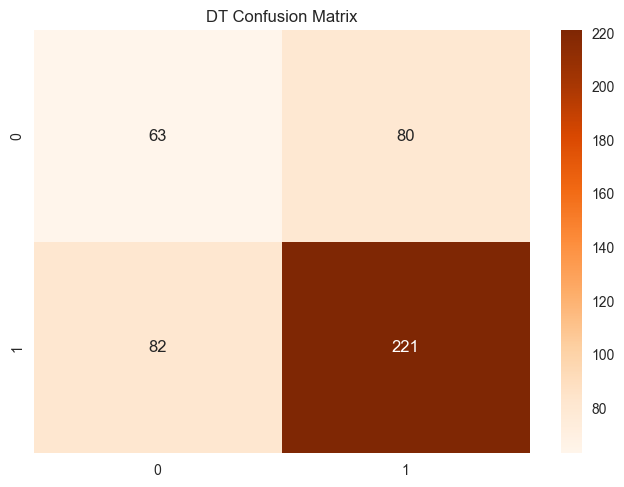

In [52]:
# Decision Trees
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(dt_X_train_scaled, dt_y_train)
dt_y_pred = decisionTree.predict(dt_X_test_scaled)

accuracy = accuracy_score(dt_y_test, dt_y_pred)
confusion_mat = confusion_matrix(dt_y_test, dt_y_pred)
print(f"DT Accuracy: {accuracy}")
sns.heatmap(confusion_matrix(dt_y_test, dt_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('DT Confusion Matrix')
plt.show()


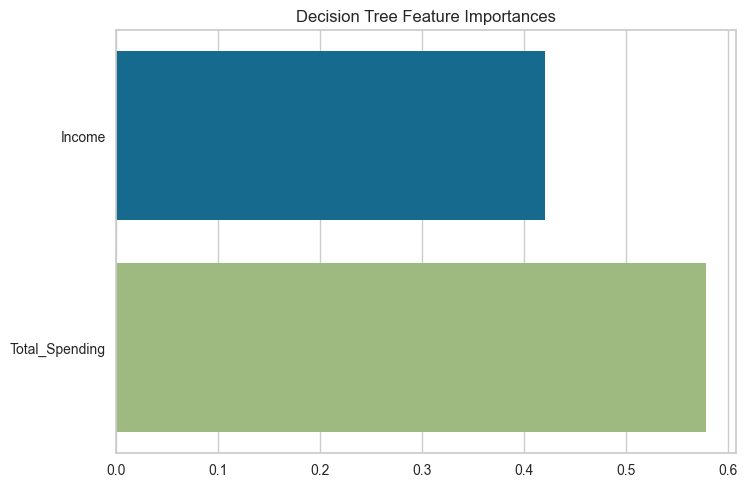

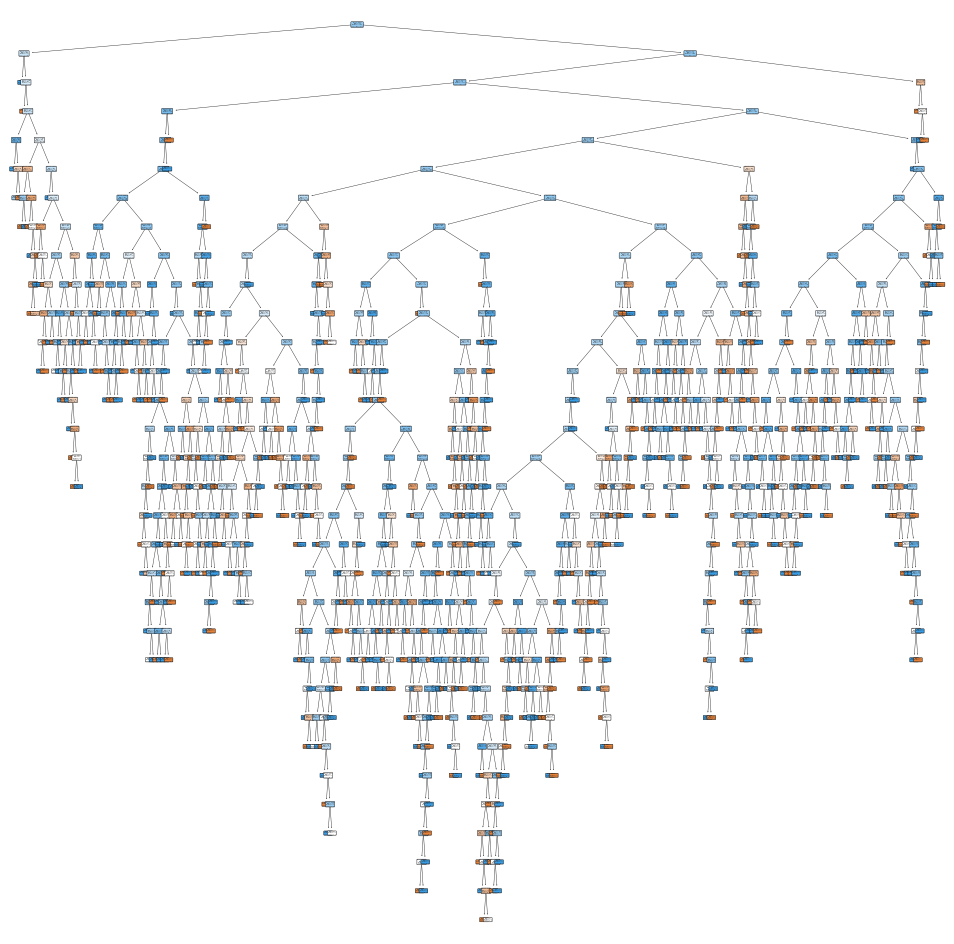

In [53]:
# Visualize decision tree rules
# Visualizing feature importances for Decision Trees
feature_importances = decisionTree.feature_importances_
feature_names = dt_X.columns
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Decision Tree Feature Importances')
plt.show()


# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decisionTree, filled=True, rounded=True)
plt.show()

## Gradient Boosting

GB Accuracy: 0.9238


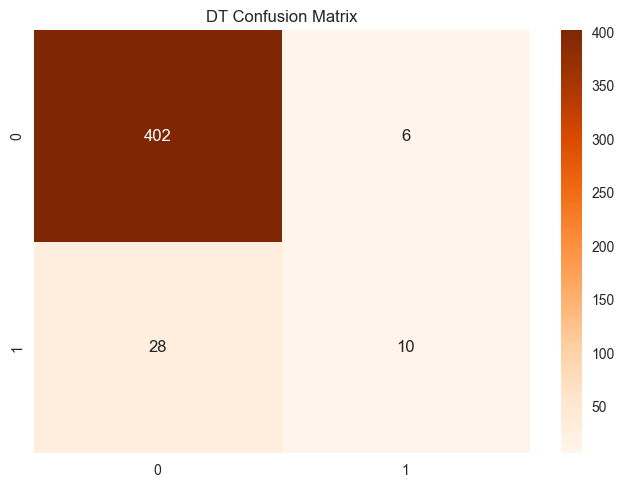

In [54]:
GB_X = data[['Income','Customer_From','Total_Spending']]
GB_y = data[['AcceptedCmp1']]

GB_X_train, GB_X_test, GB_y_train, GB_y_test = train_test_split(GB_X, GB_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
GB_X_train_scaled = scaler.fit_transform(GB_X_train)
GB_X_test_scaled = scaler.transform(GB_X_test)

gradientBoosting = GradientBoostingClassifier(random_state=42)
gradientBoosting.fit(GB_X_train_scaled, GB_y_train)


GB_y_pred = gradientBoosting.predict(GB_X_test_scaled)

accuracyGB = accuracy_score(GB_y_test, GB_y_pred)
print(f"GB Accuracy: {accuracyGB:.4f}")
sns.heatmap(confusion_matrix(GB_y_test, GB_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('DT Confusion Matrix')
plt.show()